In [48]:
import pandas as pd

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

display(df_train.head())
df_test.head()

,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu,Gaji
0,0,21,Wiraswasta,242912,SMA,9,Belum Pernah Menikah,Servis Lainnya,Perempuan,0.0,0.0,35.0,<=7jt
1,1,49,Wiraswasta,140782,10th,6,Cerai,Ekesekutif Managerial,Perempuan,0.0,0.0,40.0,<=7jt
2,2,44,Wiraswasta,120057,D3,12,Menikah,Ekesekutif Managerial,Laki2,61404000.0,0.0,45.0,>7jt
3,3,24,Wiraswasta,194630,Sarjana,13,Belum Pernah Menikah,Spesialis,Laki2,0.0,0.0,35.0,<=7jt
4,4,33,Wiraswasta,219619,Master,14,Menikah,Spesialis,Laki2,210336000.0,0.0,40.0,>7jt


,id,Umur,Kelas Pekerja,Berat Akhir,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Keuntungan Kapital,Kerugian Capital,Jam per Minggu
0,35994,30,Pemerintah Lokal,99761,D4,11,Cerai,Pemuka Agama,Perempuan,0.0,0.0,40.0
1,35995,28,Wiraswasta,202206,SMA,9,Menikah,Mesin Inspeksi,Laki2,0.0,0.0,50.0
2,35996,34,Pemerintah Provinsi,199934,Pendidikan Tinggi,10,Menikah,Pemuka Agama,Laki2,0.0,0.0,40.0
3,35997,51,Wiraswasta,373448,Pendidikan Tinggi,10,Menikah,Ekesekutif Managerial,Laki2,0.0,28028000.0,40.0
4,35998,20,?,144685,Pendidikan Tinggi,10,Belum Pernah Menikah,?,Perempuan,0.0,22428000.0,40.0


In [49]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35994 entries, 0 to 35993
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     35994 non-null  int64  
 1   Umur                   35994 non-null  int64  
 2   Kelas Pekerja          35994 non-null  object 
 3   Berat Akhir            35994 non-null  int64  
 4   Pendidikan             35994 non-null  object 
 5   Jmlh Tahun Pendidikan  35994 non-null  int64  
 6   Status Perkawinan      35994 non-null  object 
 7   Pekerjaan              35994 non-null  object 
 8   Jenis Kelamin          35994 non-null  object 
 9   Keuntungan Kapital     35994 non-null  float64
 10  Kerugian Capital       35994 non-null  float64
 11  Jam per Minggu         35994 non-null  float64
 12  Gaji                   35994 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 3.6+ MB


In [50]:
display(df_train.shape)
df_test.shape

(35994, 13)

(9599, 12)

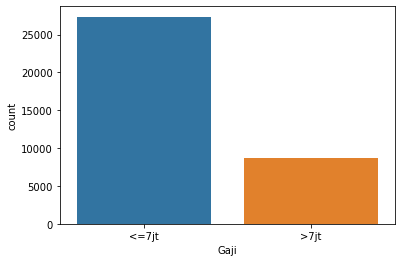

In [51]:
import seaborn as sns
sns.countplot(df_train['Gaji'])

In [52]:
display(df_train.isin(['?']).sum(axis=0))
display(df_test.isin(['?']).sum(axis=0))

id                          0
Umur                        0
Kelas Pekerja            2063
Berat Akhir                 0
Pendidikan                  0
Jmlh Tahun Pendidikan       0
Status Perkawinan           0
Pekerjaan                2069
Jenis Kelamin               0
Keuntungan Kapital          0
Kerugian Capital            0
Jam per Minggu              0
Gaji                        0
dtype: int64

id                         0
Umur                       0
Kelas Pekerja            552
Berat Akhir                0
Pendidikan                 0
Jmlh Tahun Pendidikan      0
Status Perkawinan          0
Pekerjaan                554
Jenis Kelamin              0
Keuntungan Kapital         0
Kerugian Capital           0
Jam per Minggu             0
dtype: int64

In [53]:
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer 
import numpy as np

In [54]:
#cleaning data
df_train[['Kelas Pekerja', 'Pekerjaan']] = df_train[['Kelas Pekerja', 'Pekerjaan']].replace('?',np.nan)
df_test[['Kelas Pekerja', 'Pekerjaan']] = df_test[['Kelas Pekerja', 'Pekerjaan']].replace('?',np.nan)

imputer = SimpleImputer(missing_values = np.nan, strategy='most_frequent')

imp1 = imputer.fit(df_train[['Kelas Pekerja', 'Pekerjaan']])
df_train[['Kelas Pekerja', 'Pekerjaan']] = imp1.transform(df_train[['Kelas Pekerja', 'Pekerjaan']])

imp2 = imputer.fit(df_test[['Kelas Pekerja', 'Pekerjaan']])
df_test[['Kelas Pekerja', 'Pekerjaan']] = imp2.transform(df_test[['Kelas Pekerja', 'Pekerjaan']])

display(df_train.isin(['?']).sum(axis=0))
display(df_test.isin(['?']).sum(axis=0))

id                       0
Umur                     0
Kelas Pekerja            0
Berat Akhir              0
Pendidikan               0
Jmlh Tahun Pendidikan    0
Status Perkawinan        0
Pekerjaan                0
Jenis Kelamin            0
Keuntungan Kapital       0
Kerugian Capital         0
Jam per Minggu           0
Gaji                     0
dtype: int64

id                       0
Umur                     0
Kelas Pekerja            0
Berat Akhir              0
Pendidikan               0
Jmlh Tahun Pendidikan    0
Status Perkawinan        0
Pekerjaan                0
Jenis Kelamin            0
Keuntungan Kapital       0
Kerugian Capital         0
Jam per Minggu           0
dtype: int64

In [55]:
#running a loop of value_counts of each column to find out unique values. 
for c in df_train.columns:
    print ("---- %s ---" % c)
    print (df_train[c].value_counts())
    
#dropping based on uniquness of data from the dataset 
df_train.drop(['Berat Akhir', 'Keuntungan Kapital', 'Kerugian Capital', 'Jam per Minggu'], axis=1, inplace=True)
df_test.drop(['Berat Akhir', 'Keuntungan Kapital', 'Kerugian Capital', 'Jam per Minggu'], axis=1, inplace=True)
df_train.head()

---- id ---
2047     1
13612    1
23873    1
21824    1
34106    1
        ..
15026    1
12979    1
2740     1
693      1
0        1
Name: id, Length: 35994, dtype: int64
---- Umur ---
36    994
31    976
33    975
35    971
34    956
     ... 
83      8
88      5
87      3
85      2
86      1
Name: Umur, Length: 73, dtype: int64
---- Kelas Pekerja ---
Wiraswasta                       27011
Pekerja Bebas Bukan Perusahan     2866
Pemerintah Lokal                  2280
Pemerintah Negara                 1477
Pekerja Bebas Perusahaan          1273
Pemerintah Provinsi               1066
Tanpa di Bayar                      15
Tidak Pernah Bekerja                 6
Name: Kelas Pekerja, dtype: int64
---- Berat Akhir ---
203488    17
190290    15
126569    14
120277    14
125892    13
          ..
162876     1
40000      1
113732     1
177221     1
208174     1
Name: Berat Akhir, Length: 23365, dtype: int64
---- Pendidikan ---
SMA                     11666
Pendidikan Tinggi        8005
Sarjana 

,id,Umur,Kelas Pekerja,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Gaji
0,0,21,Wiraswasta,SMA,9,Belum Pernah Menikah,Servis Lainnya,Perempuan,<=7jt
1,1,49,Wiraswasta,10th,6,Cerai,Ekesekutif Managerial,Perempuan,<=7jt
2,2,44,Wiraswasta,D3,12,Menikah,Ekesekutif Managerial,Laki2,>7jt
3,3,24,Wiraswasta,Sarjana,13,Belum Pernah Menikah,Spesialis,Laki2,<=7jt
4,4,33,Wiraswasta,Master,14,Menikah,Spesialis,Laki2,>7jt


In [56]:
#encoding categorical data into numerical data
classworker = LabelEncoder().fit(df_train['Kelas Pekerja'])
gender = LabelEncoder().fit(df_train['Jenis Kelamin'])
edu = LabelEncoder().fit(df_train['Pendidikan'])
job = LabelEncoder().fit(df_train['Pekerjaan'])
married_sts = LabelEncoder().fit(df_train['Status Perkawinan'])

df_train['Jenis Kelamin'] = gender.transform(df_train['Jenis Kelamin'])
df_train['Kelas Pekerja'] = classworker.transform(df_train['Kelas Pekerja'])
df_train['Pendidikan'] = edu.transform(df_train['Pendidikan'])
df_train['Pekerjaan'] = job.transform(df_train['Pekerjaan'])
df_train['Status Perkawinan'] = married_sts.transform(df_train['Status Perkawinan'])

df_train['Gaji'] = LabelEncoder().fit_transform(df_train['Gaji'])

df_test['Jenis Kelamin'] = gender.transform(df_test['Jenis Kelamin'])
df_test['Kelas Pekerja'] = classworker.transform(df_test['Kelas Pekerja'])
df_test['Pendidikan'] = edu.transform(df_test['Pendidikan'])
df_test['Pekerjaan'] = job.transform(df_test['Pekerjaan'])
df_test['Status Perkawinan'] = married_sts.transform(df_test['Status Perkawinan'])

display(df_train.head())
display(df_test.head())

,id,Umur,Kelas Pekerja,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin,Gaji
0,0,21,7,13,9,0,9,1,0
1,1,49,7,0,6,2,1,1,0
2,2,44,7,7,12,4,1,0,1
3,3,24,7,14,13,0,10,0,0
4,4,33,7,10,14,4,10,0,1


,id,Umur,Kelas Pekerja,Pendidikan,Jmlh Tahun Pendidikan,Status Perkawinan,Pekerjaan,Jenis Kelamin
0,35994,30,2,8,11,2,4,1
1,35995,28,7,13,9,4,2,0
2,35996,34,4,11,10,4,4,0
3,35997,51,7,11,10,4,1,0
4,35998,20,7,11,10,0,6,1


In [57]:
X_train = df_train.drop('Gaji', axis=1)
y_train = df_train['Gaji']
X_test = df_test

In [58]:
#Decision Tree Model
param_dt = {
    'criterion' : ['gini', 'entropy'],
    'splitter' : ['best', 'random'],
    'max_depth' : [1,3,5,7,9,11,13],
    'min_samples_leaf' : [10, 20, 30,40]
}

grid_dt = GridSearchCV(DecisionTreeClassifier(), param_dt, scoring='roc_auc', cv=5)

grid_dt.fit(X_train, y_train)

grid_dt_pred = grid_dt.predict(X_test)

print('Best Parameter: ', grid_dt.best_params_)
print('score: ', grid_dt.best_score_)

Best Parameter:  {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 40, 'splitter': 'best'}
score:  0.8712493928260565


In [11]:
#Logistic Regression Model
param_lr = {
    'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4,4,20),
    'solver' : ['liblinear'],
}

grid_lr = GridSearchCV(LogisticRegression(), param_lr, scoring='roc_auc', cv=5)

grid_lr.fit(X_train, y_train)

grid_lr_pred = grid_lr.predict(X_test)

print('Best Parameter: ', grid_lr.best_params_)
print('Score: ', grid_lr.best_score_)

Best Parameter:  {'C': 78.47599703514607, 'penalty': 'l2', 'solver': 'liblinear'}
Score:  0.8552952622350857


In [163]:
#Random Forest Model
param_rf = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [1, 2, 3],
    'min_samples_leaf': [3, 4, 5, 6, 7],
    'min_samples_split': [4, 6, 8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

grid_rf = RandomizedSearchCV(RandomForestClassifier(), param_rf, scoring='roc_auc', cv=5)

grid_rf.fit(X_train, y_train)

grid_rf_pred = grid_rf.predict(X_test)

print('hyperparameter terbaik untuk kombinasi hyperparameter Decision Tree Classifier model saya adalah:\n', grid_rf.best_params_)
print('score validasi terbaik dari model tersebut: ', grid_rf.best_score_)

hyperparameter terbaik untuk kombinasi hyperparameter Decision Tree Classifier model saya adalah:
 {'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_features': 1, 'max_depth': 110, 'bootstrap': True}
score validasi terbaik dari model tersebut:  0.8810147382858716


In [23]:
#Bayesian Network Model

param_bn = {
    'n_neighbors' : [1,3,5,7,9],
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan', 'minkowski'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_knn, scoring='roc_auc', cv=5)

grid_knn.fit(X_train, y_train)

grid_knn_pred = grid_knn.predict(X_test)

In [151]:
#Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB

gnb = GaussianNB()
cnb = CategoricalNB()

gnb.fit(X_train,y_train)
cnb.fit(X_train,y_train)

gnb_pred = gnb.predict(X_test)
cnb_pred = cnb.predict(X_test)

print('score accuracy gnb: ', gnb.score(X_test, gnb_pred))
print('score accuracy cnb: ', cnb.score(X_test, cnb_pred))

score accuracy gnb:  1.0
score accuracy cnb:  1.0


In [12]:
df_test = pd.read_csv('test.csv')

sub = pd.DataFrame({'id': df_test['id'],
                    'Gaji': grid_lr_pred})

sub.to_csv('pendapatan_gaji.csv', index=False)